In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from tensorflow import keras

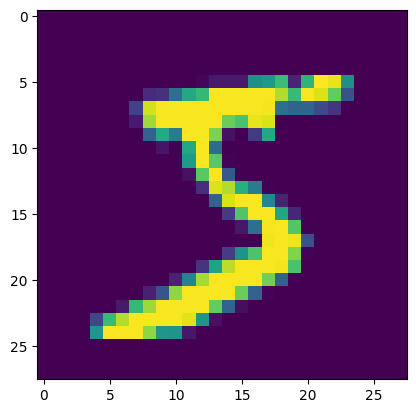

In [5]:
plt.imshow(x_train[0])

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(y_train[0])

5


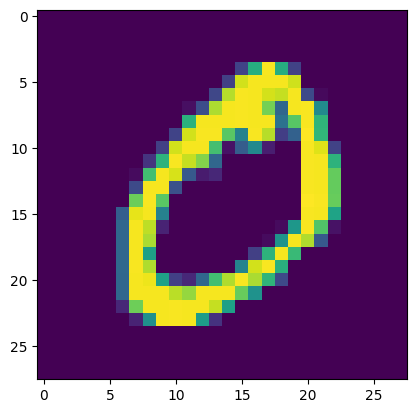

In [9]:
plt.imshow(x_train[1])

In [10]:
print(y_train[1])

0


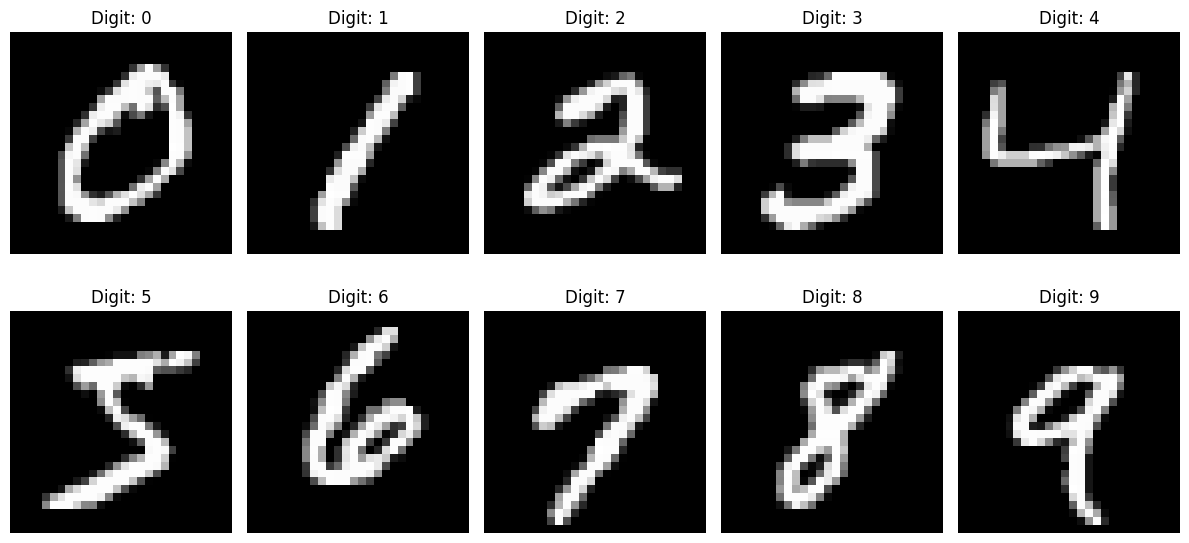

In [11]:
# Define digit classes (optional, for clarity)
digit_classes = [str(i) for i in range(10)]  # List of digit labels (0-9)

# Function to display a digit image
def show_digit(image, label, ax):
  ax.imshow(image, cmap='gray')
  ax.set_title(f"Digit: {digit_classes[label]}")
  ax.axis('off')  # Optional: Turn off axes for cleaner presentation

# Create a 2x5 subplot grid with a larger figure size for better visualization
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Flatten the axes for easier iteration
axes_flat = axes.ravel()

for i in range(10):
  # Find the first image of each digit class (label)
  image_index = np.where(y_train == i)[0][0]
  image = x_train[image_index]
  label = y_train[image_index]

  # Use the current index in the flattened axes
  current_ax = axes_flat[i]
  show_digit(image, label, ax=current_ax)

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()


In [12]:
#normalize the data
x_train = x_train/ 255.0
y_train = y_train/ 255.0

In [13]:
from tensorflow.keras import layers

model = tf.keras.Sequential([layers.Flatten(),
                              layers.Dense(150, activation='relu'),
                              layers.Dense(20, activation='softmax')])

In [14]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if(logs.get('accuracy') >= 0.9):
      print("Training reached to it's threhold ")
      self.model.stop_training = True

In [16]:
callbacks = mycallback()

In [17]:
model.fit(x_train, y_train, epochs = 5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0981 - loss: 0.4282
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0981 - loss: 3.0827e-04
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0995 - loss: 6.9746e-05
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0988 - loss: 2.1683e-05
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0965 - loss: 7.5006e-06


In [18]:
# Make predictions on the test images

predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
predicted_classes = np.argmax(predictions, axis=1)

In [20]:
test_images = x_test.astype('float32') / 255.0  

In [21]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Model Accuracy on Test Data: {accuracy:.4f}")

Model Accuracy on Test Data: 0.0980


In [22]:
print(y_test[0] , predicted_classes[0])

7 0


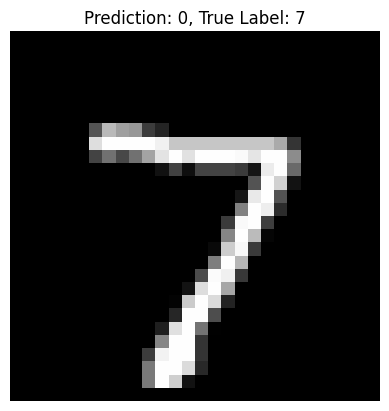

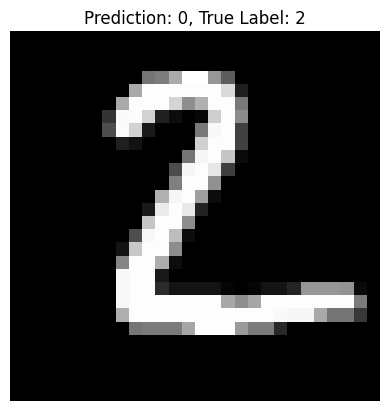

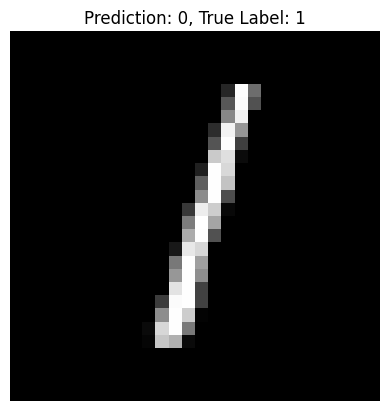

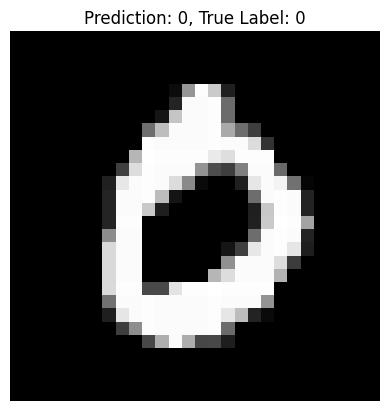

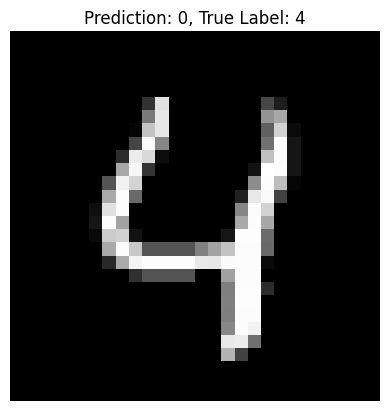

In [23]:
# Print some predictions and their corresponding images (optional)
for i in range(5):  # Show predictions for the first 5 images
  image = test_images[i]
  prediction = predicted_classes[i]
  true_label = y_test[i]
  plt.imshow(image, cmap='gray')
  plt.title(f"Prediction: {prediction}, True Label: {true_label}")
  plt.axis('off')
  plt.show()

In [24]:
data = {'Test label' : y_test}
y_test = pd.DataFrame(data) 

In [26]:
print(y_test)

      Test label
0              7
1              2
2              1
3              0
4              4
...          ...
9995           2
9996           3
9997           4
9998           5
9999           6

[10000 rows x 1 columns]
